<a href="https://colab.research.google.com/github/deutschkihun/DataScience/blob/master/Stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stock price prediction**

## **Source file folder**
- [Google drive](https://drive.google.com/drive/folders/1fiPVMkS4VoQtOzlhIU16__lklyIbMLiU?usp=sharing)

## **Reference**
- [Github](https://github.com/kairess/stock_crypto_price_prediction/blob/master/stock_samsung.ipynb)
- [Yahoo finance](https://finance.yahoo.com/)



## 1.Importing Libraries 

In [39]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
from keras.callbacks import ModelCheckpoint
import tensorflow as tf
import datetime

## 2.Reading datasets

In [55]:
starbucks = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ML DL/Projects/stock price prediction/starbucks.csv')

In [27]:
starbucks.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-06-17,53.090000,53.470001,52.720001,53.240002,48.607132,6735300
1,2015-06-18,53.500000,54.279999,53.400002,54.110001,49.401436,10711000
2,2015-06-19,54.080002,54.439999,53.840000,53.930000,49.237091,10609700
3,2015-06-22,54.330002,54.430000,53.880001,53.900002,49.209702,7100700
4,2015-06-23,54.040001,54.180000,53.720001,54.119999,49.410557,5679000


## 3. Compute Mid Price

In [28]:
high_prices = starbucks['High'].values
low_prices = starbucks['Low'].values
mid_prices = (high_prices + low_prices) / 2

## 4.  Create Windows

In [29]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

## 5.Normalization  

In [30]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.8))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((966, 50, 1), (242, 50, 1))

## 6. Modeling

In [43]:
def solution_model():

  model = Sequential()
  model.add(LSTM(50,return_sequences=True))
  model.add(LSTM(64,return_sequences=False))
  model.add(Dense(10,activation='relu'))
  model.add(Dense(1,activation='linear'))


  model.compile(loss='mse',optimizer='rmsprop',metrics=['accuracy'])

  checkpoint_path = 'stockprice_checkpoint.ckpt'
  checkpoint = ModelCheckpoint(checkpoint_path,
                               save_weights_only=True, 
                               save_best_only=True, 
                               monitor='val_loss')

  model.fit(x_train,y_train,
            validation_data=(x_test,y_test),
            callbacks=[checkpoint],
            batch_size=10,
            epochs=20)
  model.load_weights(checkpoint_path)

  return model 

## 7.Training 

In [44]:
if __name__ == '__main__':
    model = solution_model()
    model.save("mymodel.h5")

Train on 966 samples, validate on 242 samples
Epoch 1/20
966/966 [==============================] - 6s 6ms/step - loss: 0.0013 - accuracy: 0.0000e+00 - val_loss: 0.0025 - val_accuracy: 0.0000e+00
Epoch 2/20
966/966 [==============================] - 6s 6ms/step - loss: 6.6030e-04 - accuracy: 0.0000e+00 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 3/20
966/966 [==============================] - 6s 6ms/step - loss: 5.2737e-04 - accuracy: 0.0000e+00 - val_loss: 0.0016 - val_accuracy: 0.0000e+00
Epoch 4/20
966/966 [==============================] - 6s 6ms/step - loss: 4.3344e-04 - accuracy: 0.0000e+00 - val_loss: 0.0010 - val_accuracy: 0.0000e+00
Epoch 5/20
966/966 [==============================] - 6s 6ms/step - loss: 3.5797e-04 - accuracy: 0.0000e+00 - val_loss: 9.4972e-04 - val_accuracy: 0.0000e+00
Epoch 6/20
966/966 [==============================] - 6s 6ms/step - loss: 3.1175e-04 - accuracy: 0.0000e+00 - val_loss: 8.1998e-04 - val_accuracy: 0.0000e+00
Epoch 7/20
966/966 [======

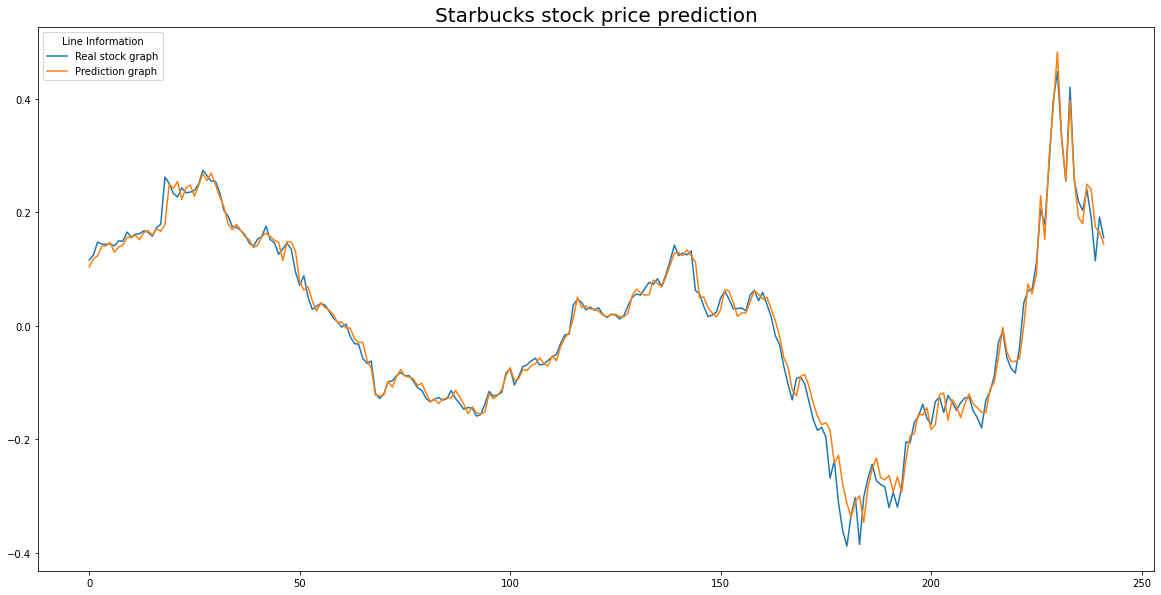

In [54]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend(['Real stock graph','Prediction graph'],title='Line Information')
plt.title('Starbucks stock price prediction',fontsize=20);

## **9. Same process for Delta**

In [69]:
delta = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ML DL/Projects/stock price prediction/delta.csv')

In [66]:
high_prices = delta['High'].values
low_prices = delta['Low'].values
mid_prices = (high_prices + low_prices) / 2


seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])



normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.8))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape





def solution_model():

  model = Sequential()
  model.add(LSTM(50,return_sequences=True))
  model.add(LSTM(64,return_sequences=False))
  model.add(Dense(20,activation='relu'))
  model.add(Dense(10,activation='relu'))
  model.add(Dense(1,activation='linear'))


  model.compile(loss='mse',optimizer='rmsprop',metrics=['accuracy'])

  checkpoint_path = 'stockprice_checkpoint.ckpt'
  checkpoint = ModelCheckpoint(checkpoint_path,
                               save_weights_only=True, 
                               save_best_only=True, 
                               monitor='val_loss')

  model.fit(x_train,y_train,
            validation_data=(x_test,y_test),
            callbacks=[checkpoint],
            batch_size=15,
            epochs=30)
  model.load_weights(checkpoint_path)

  return model 


if __name__ == '__main__':
    model = solution_model()
    model.save("mymodel.h5")



Train on 966 samples, validate on 242 samples
Epoch 1/30
966/966 [==============================] - 5s 5ms/step - loss: 0.0032 - accuracy: 0.0000e+00 - val_loss: 0.0220 - val_accuracy: 0.0000e+00
Epoch 2/30
966/966 [==============================] - 4s 4ms/step - loss: 0.0015 - accuracy: 0.0000e+00 - val_loss: 0.0123 - val_accuracy: 0.0000e+00
Epoch 3/30
966/966 [==============================] - 4s 4ms/step - loss: 0.0011 - accuracy: 0.0000e+00 - val_loss: 0.0103 - val_accuracy: 0.0000e+00
Epoch 4/30
966/966 [==============================] - 4s 4ms/step - loss: 9.0463e-04 - accuracy: 0.0000e+00 - val_loss: 0.0049 - val_accuracy: 0.0000e+00
Epoch 5/30
966/966 [==============================] - 4s 4ms/step - loss: 7.1243e-04 - accuracy: 0.0000e+00 - val_loss: 0.0057 - val_accuracy: 0.0000e+00
Epoch 6/30
966/966 [==============================] - 4s 4ms/step - loss: 6.2701e-04 - accuracy: 0.0000e+00 - val_loss: 0.0045 - val_accuracy: 0.0000e+00
Epoch 7/30
966/966 [======================

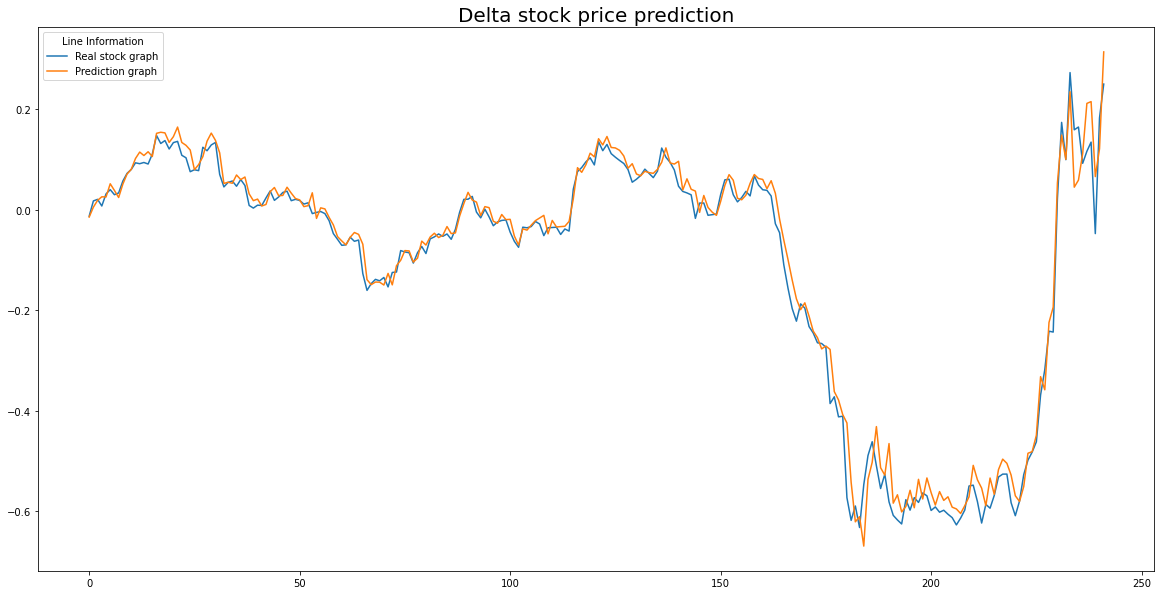

In [68]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend(['Real stock graph','Prediction graph'],title='Line Information')
plt.title('Delta stock price prediction',fontsize=20);

## **10. Same process for Kakao**

In [70]:
kakao = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ML DL/Projects/stock price prediction/kakao.csv')

In [71]:
kakao.isna().sum()
kakao.dropna(inplace=True)

In [72]:
high_prices = kakao['High'].values
low_prices = kakao['Low'].values
mid_prices = (high_prices + low_prices) / 2


seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])



normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.8))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape





def solution_model():

  model = Sequential()
  model.add(LSTM(50,return_sequences=True))
  model.add(LSTM(64,return_sequences=False))
  model.add(Dense(10,activation='relu'))
  model.add(Dense(1,activation='linear'))


  model.compile(loss='mse',optimizer='rmsprop',metrics=['accuracy'])

  checkpoint_path = 'stockprice_checkpoint.ckpt'
  checkpoint = ModelCheckpoint(checkpoint_path,
                               save_weights_only=True, 
                               save_best_only=True, 
                               monitor='val_loss')

  model.fit(x_train,y_train,
            validation_data=(x_test,y_test),
            callbacks=[checkpoint],
            batch_size=10,
            epochs=20)
  model.load_weights(checkpoint_path)

  return model 


if __name__ == '__main__':
    model = solution_model()
    model.save("mymodel.h5")


Train on 938 samples, validate on 234 samples
Epoch 1/20
938/938 [==============================] - 6s 7ms/step - loss: 0.0035 - accuracy: 0.0032 - val_loss: 0.0063 - val_accuracy: 0.0128
Epoch 2/20
938/938 [==============================] - 5s 6ms/step - loss: 0.0018 - accuracy: 0.0032 - val_loss: 0.0029 - val_accuracy: 0.0128
Epoch 3/20
938/938 [==============================] - 6s 6ms/step - loss: 0.0014 - accuracy: 0.0032 - val_loss: 0.0024 - val_accuracy: 0.0128
Epoch 4/20
938/938 [==============================] - 6s 6ms/step - loss: 0.0011 - accuracy: 0.0032 - val_loss: 0.0011 - val_accuracy: 0.0128
Epoch 5/20
938/938 [==============================] - 6s 7ms/step - loss: 8.7575e-04 - accuracy: 0.0032 - val_loss: 0.0014 - val_accuracy: 0.0128
Epoch 6/20
938/938 [==============================] - 5s 6ms/step - loss: 7.0419e-04 - accuracy: 0.0032 - val_loss: 7.9078e-04 - val_accuracy: 0.0128
Epoch 7/20
938/938 [==============================] - 5s 6ms/step - loss: 6.5063e-04 - acc

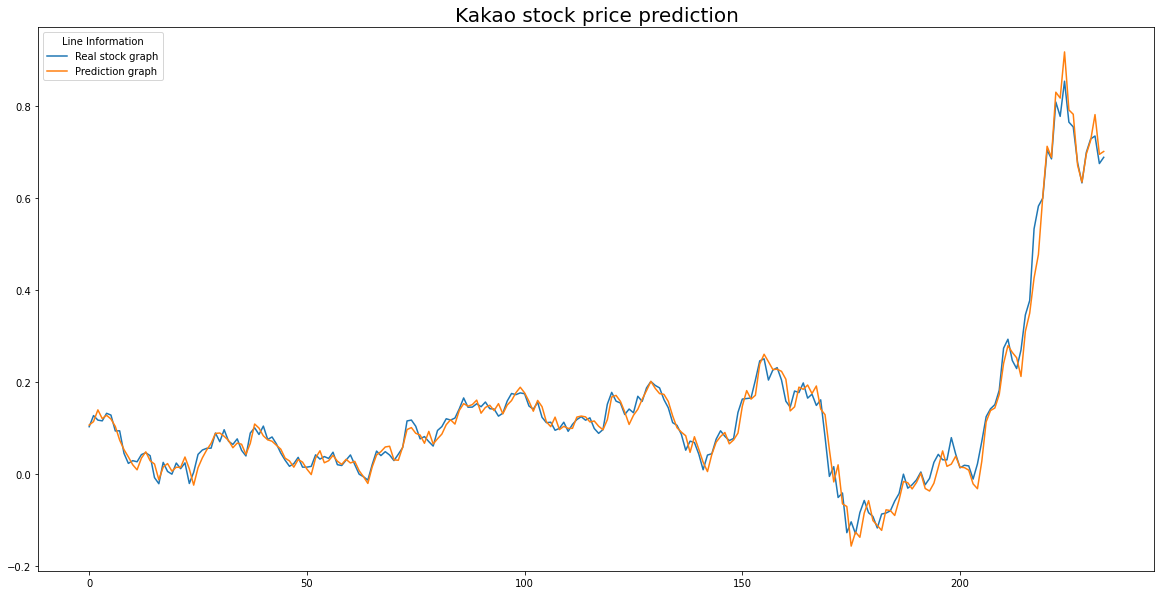

In [73]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend(['Real stock graph','Prediction graph'],title='Line Information')
plt.title('Kakao stock price prediction',fontsize=20);